In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [14]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /Users/daniyalkhan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-11 Python-3.12.3 torch-2.3.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [15]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [16]:
imgs ='goku-8696663_1280.png'

In [17]:
results = model(imgs)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 721x1280 1 person
Speed: 61.4ms pre-process, 76.9ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)

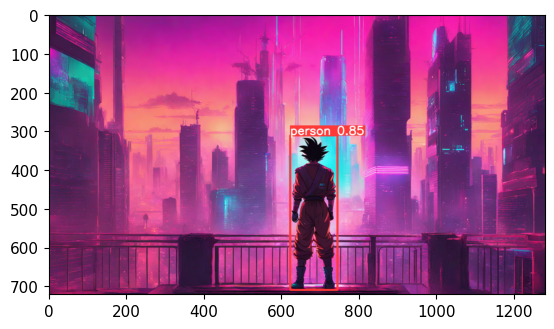

In [18]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [19]:
#we can get differnt cordinates like
results.xyxy

[tensor([[622.63849, 312.45737, 744.42426, 710.39319,   0.85474,   0.00000]])]

In [20]:
results.render()[0].shape

(721, 1280, 3)

In [21]:
cap = cv2.VideoCapture(0) #we can put video name here also so it can detect from that
while cap.isOpened():
    ret, frame = cap.read()
    cv2.startWindowThread()

    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [6]:
import uuid   # Unique identifier to name the images as we collect in real time
import os
import time

In [24]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [26]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        cv2.startWindowThread()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [27]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.acfca10e-0fb0-11ef-8031-46b8ccd43684.jpg


In [65]:
! yolo task=detect mode=train model=yolov5s.pt data= data.yaml epochs=15 imgsz=640

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics YOLOv8.2.12 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False

In [2]:
from ultralytics import YOLO

In [3]:
det_model = YOLO('runs/detect/train/weights/last.pt')

In [4]:
det_model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_st

In [7]:
img = os.path.join('data', 'images', 'awake-835254d4-0fb0-11ef-8031-46b8ccd43684_jpg.rf.5e19076fa851bda6a86382b735635e70.jpg')

In [8]:
results = det_model(img)


image 1/1 /Users/daniyalkhan/Documents/AI/Projects/DrowsinessDetectionSystem/data/images/awake-835254d4-0fb0-11ef-8031-46b8ccd43684_jpg.rf.5e19076fa851bda6a86382b735635e70.jpg: 384x640 2 awakes, 120.0ms
Speed: 3.6ms preprocess, 120.0ms inference, 325.5ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
results[0].plot().shape

(720, 1280, 3)

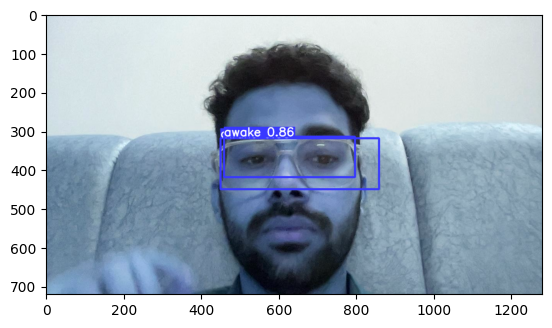

In [10]:
%matplotlib inline 
plt.imshow(results[0].plot())
plt.show()

In [13]:
cap = cv2.VideoCapture(0) #we can put video name here also so it can detect from that
while cap.isOpened():
    ret, frame = cap.read()
    cv2.startWindowThread()

    results = det_model(frame)
    
    cv2.imshow('YOLO', results[0].plot())
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


0: 384x640 (no detections), 115.3ms
Speed: 2.7ms preprocess, 115.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 awakes, 1 sleepy, 99.2ms
Speed: 1.1ms preprocess, 99.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 awakes, 1 sleepy, 89.9ms
Speed: 1.2ms preprocess, 89.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 awakes, 92.4ms
Speed: 0.9ms preprocess, 92.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 awakes, 1 sleepy, 88.3ms
Speed: 1.7ms preprocess, 88.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 awake, 84.7ms
Speed: 1.1ms preprocess, 84.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 awakes, 1 sleepy, 86.7ms
Speed: 1.2ms preprocess, 86.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 awake, 1 sleepy, 86.6ms
Speed: 1.1ms preprocess, 86.6ms 

-1